In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
dataset = pd.read_csv('Provisional_Natality_2023_jan_2024.txt', sep = '\t') 
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16583 entries, 0 to 16582
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Notes                                28 non-null     object 
 1   State of Residence                   16555 non-null  object 
 2   State of Residence Code              16555 non-null  float64
 3   Age of Mother 9                      16555 non-null  object 
 4   Age of Mother 9 Code                 16555 non-null  object 
 5   Mother's Single Race 6               16555 non-null  object 
 6   Mother's Single Race 6 Code          16555 non-null  object 
 7   Mother's Education                   16555 non-null  object 
 8   Mother's Education Code              16555 non-null  object 
 9   Source of Payment for Delivery       16555 non-null  object 
 10  Source of Payment for Delivery Code  16555 non-null  float64
 11  Births                      

,Notes,State of Residence,State of Residence Code,Age of Mother 9,Age of Mother 9 Code,Mother's Single Race 6,Mother's Single Race 6 Code,Mother's Education,Mother's Education Code,Source of Payment for Delivery,Source of Payment for Delivery Code,Births,% of Total Births
0,NaN,Alabama,1.0,Under 15 years,15,Black or African American,2054-5,8th grade or less,1,Medicaid,1.0,17.0,0.00%
1,NaN,Alabama,1.0,Under 15 years,15,White,2106-3,8th grade or less,1,Medicaid,1.0,16.0,0.00%
2,NaN,Alabama,1.0,15-19 years,15-19,Black or African American,2054-5,8th grade or less,1,Medicaid,1.0,28.0,0.00%
3,NaN,Alabama,1.0,15-19 years,15-19,Black or African American,2054-5,9th through 12th grade with no diploma,2,Medicaid,1.0,424.0,0.01%
4,NaN,Alabama,1.0,15-19 years,15-19,Black or African American,2054-5,9th through 12th grade with no diploma,2,Private Insurance,2.0,31.0,0.00%


In [4]:
dataset.columns
keep_cols = ['State of Residence',
       'Age of Mother 9', 'Age of Mother 9 Code', "Mother's Single Race 6",
       "Mother's Education Code", 'Source of Payment for Delivery',
       'Source of Payment for Delivery Code', 'Births', "% of Total Births"]
new_dataset = dataset[keep_cols]
new_dataset

,State of Residence,Age of Mother 9,Age of Mother 9 Code,Mother's Single Race 6,Mother's Education Code,Source of Payment for Delivery,Source of Payment for Delivery Code,Births,% of Total Births
0,Alabama,Under 15 years,15,Black or African American,1,Medicaid,1.0,17.0,0.00%
1,Alabama,Under 15 years,15,White,1,Medicaid,1.0,16.0,0.00%
2,Alabama,15-19 years,15-19,Black or African American,1,Medicaid,1.0,28.0,0.00%
3,Alabama,15-19 years,15-19,Black or African American,2,Medicaid,1.0,424.0,0.01%
4,Alabama,15-19 years,15-19,Black or African American,2,Private Insurance,2.0,31.0,0.00%
...,...,...,...,...,...,...,...,...,...
16578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I could sum the popultion for each race 

In [5]:
race_payment = new_dataset.groupby(["Mother's Single Race 6", 'Source of Payment for Delivery']).agg({'Births':'sum'})
race_payment.reset_index(inplace= True)
race_sum = new_dataset.groupby(["Mother's Single Race 6"]).agg({'Births':'sum'})
race_sum = race_sum.rename(columns={"Births": "Birth_Sum"})
race_sum.reset_index(inplace= True)
merged_df = pd.merge(race_payment, race_sum,how= 'left', on= "Mother's Single Race 6")
race_payment['race_percent'] = round((merged_df['Births']/merged_df['Birth_Sum'])*100, 2)
race_payment


,Mother's Single Race 6,Source of Payment for Delivery,Births,race_percent
0,American Indian or Alaska Native,Medicaid,20796.0,73.60
1,American Indian or Alaska Native,Other,1491.0,5.28
2,American Indian or Alaska Native,Private Insurance,5822.0,20.60
3,American Indian or Alaska Native,Self Pay,134.0,0.47
4,American Indian or Alaska Native,Unknown or Not Stated,13.0,0.05
5,Asian,Medicaid,53327.0,22.67
6,Asian,Other,4615.0,1.96
7,Asian,Private Insurance,171523.0,72.91
8,Asian,Self Pay,4792.0,2.04
9,Asian,Unknown or Not Stated,996.0,0.42


In [6]:
subset = race_payment[race_payment['Source of Payment for Delivery'] == 'Medicaid']
subset

,Mother's Single Race 6,Source of Payment for Delivery,Births,race_percent
0,American Indian or Alaska Native,Medicaid,20796.0,73.60
5,Asian,Medicaid,53327.0,22.67
10,Black or African American,Medicaid,378473.0,64.92
15,More than one race,Medicaid,51076.0,49.78
20,Native Hawaiian or Other Pacific Islander,Medicaid,6485.0,72.65
25,White,Medicaid,1067946.0,37.46


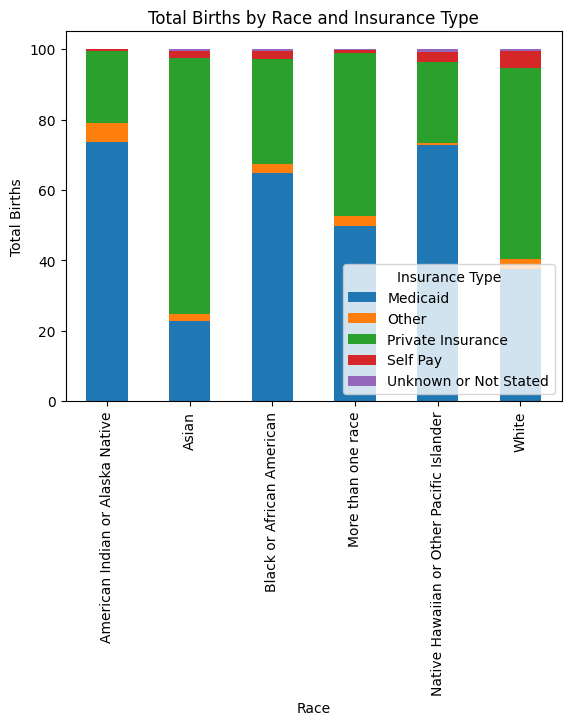

In [11]:
df = pd.DataFrame(race_payment)
pivot_data = df.pivot( index= "Mother's Single Race 6", columns= 'Source of Payment for Delivery', values= 'race_percent')
#fig, ax = plt.subplots()
#races = race_payment['Mother\'s Single Race 6'].unique()


#for race in list of 

#ax.bar(race_payment["Mother's Single Race 6"], race_payment['Births'])

pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Total Births')
plt.title('Total Births by Race and Insurance Type')
plt.legend(title='Insurance Type')
plt.show()



Analysis 1 feedback:

another chart 6 pi-charts. add the total for each race at the botton of each pi chart. 